In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import copy
from scipy import sparse

In [2]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib import cm
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
norm = matplotlib.colors.Normalize(vmin=0, vmax=20)

import matplotlib.font_manager as font_manager
font_dirs = ['/project/elkabetz_lab_data/tools/PythonFonts/', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.rcParams['font.family'] = 'arial'
import pickle as pkl

In [3]:
from lik_models import *
from helper_funcs import *
from plotting_funcs import *
from mcmc_data import *

In [5]:
mcmc = mcmc_data(count_matrix_fn='/project/single_cell/Daniel/Transcriptional_Cascades/scripts/Transcriptional_Cascades/data/e13_5_mouse_forebrain_neuron_diff.2.slingshot_ordered.raw_count_matrix.tsv',
                          pkl_dir='/project/single_cell/Daniel/Transcriptional_Cascades/scripts/Transcriptional_Cascades/outputs_full/e13_5_forebrain_dorsal_2_slingshot/',
                          tfs_fn='/project/single_cell/Transcriptional_Cascades/data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e13.5 Mouse Cortical Neuron')

Loading Count Matrix...
Normalizing Count Matrix...


In [111]:
#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading pkls...
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500


In [8]:
fit_types = {}
non_unif_fits = {}
for gene in mcmc.inflection_points:
    if mcmc.best_fits[gene] != 'uniform':
        non_unif_fits[gene] = mcmc.inflection_points[gene]
    else:
        fit_types[gene] = "uniform"
for type_ in ['sig down','sig up','transient up','transient down']:
    print(type_)
    for gene in [y[0] for y in sorted(non_unif_fits.items(),key = lambda x:get_mode(x[1],n_bins=50))]:
        if type_ is not None:
            keep = False
            if type_ == 'sig up':
                if mcmc.best_fits[gene] == 'sigmoidal':
                    if np.mean(mcmc.inflection_point_derivs[gene]) > 0:
                        fit_types[gene] = 'sig up'
                elif mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) > 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) > 0):
                        fit_types[gene] = 'sig up'
            elif type_ == 'sig down':
                if mcmc.best_fits[gene] == 'sigmoidal':
                    if np.mean(mcmc.inflection_point_derivs[gene]) < 0:
                        fit_types[gene] = 'sig down'
                elif mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) < 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) < 0):
                        fit_types[gene] = 'sig down'
            elif type_ == 'transient up':
                if mcmc.best_fits[gene] == 'gauss':
                    fit_types[gene] = 'transient up'
                if mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) > 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) < 0):
                        fit_types[gene] = 'transient up'
            elif type_ == 'transient down':
                if mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) < 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) > 0):
                        fit_types[gene] = 'transient down'

sig down
sig up
transient up
transient down


In [9]:
fit_types_slingshot = fit_types
mcmc_slingshot = mcmc

In [10]:
mcmc = mcmc_data(count_matrix_fn='/project/single_cell/Daniel/Transcriptional_Cascades/scripts/Transcriptional_Cascades/data/e13_5_mouse_forebrain_neuron_diff.2.monocle_ordered.raw_count_matrix.tsv',
                          pkl_dir='/project/single_cell/Daniel/Transcriptional_Cascades/scripts/Transcriptional_Cascades/outputs_full/e13_5_forebrain_dorsal_2_monocle/',
                          tfs_fn='/project/single_cell/Transcriptional_Cascades/data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e13.5 Mouse Cortical Neuron')

Loading Count Matrix...
Normalizing Count Matrix...


In [11]:
#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading pkls...
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500


In [12]:
fit_types = {}
non_unif_fits = {}
for gene in mcmc.inflection_points:
    if mcmc.best_fits[gene] != 'uniform':
        non_unif_fits[gene] = mcmc.inflection_points[gene]
    else:
        fit_types[gene] = "uniform"
for type_ in ['sig down','sig up','transient up','transient down']:
    print(type_)
    for gene in [y[0] for y in sorted(non_unif_fits.items(),key = lambda x:get_mode(x[1],n_bins=50))]:
        if type_ is not None:
            keep = False
            if type_ == 'sig up':
                if mcmc.best_fits[gene] == 'sigmoidal':
                    if np.mean(mcmc.inflection_point_derivs[gene]) > 0:
                        fit_types[gene] = 'sig up'
                elif mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) > 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) > 0):
                        fit_types[gene] = 'sig up'
            elif type_ == 'sig down':
                if mcmc.best_fits[gene] == 'sigmoidal':
                    if np.mean(mcmc.inflection_point_derivs[gene]) < 0:
                        fit_types[gene] = 'sig down'
                elif mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) < 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) < 0):
                        fit_types[gene] = 'sig down'
            elif type_ == 'transient up':
                if mcmc.best_fits[gene] == 'gauss':
                    fit_types[gene] = 'transient up'
                if mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) > 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) < 0):
                        fit_types[gene] = 'transient up'
            elif type_ == 'transient down':
                if mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) < 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) > 0):
                        fit_types[gene] = 'transient down'

sig down
sig up
transient up
transient down


In [13]:
fit_types_monocle = fit_types
mcmc_monocle = mcmc

In [14]:
mcmc = mcmc_data(count_matrix_fn='/project/single_cell/Transcriptional_Cascades/data/e13_5_mouse_forebrain_neuron_diff.2.raw_count_matrix.tsv',
                          pkl_dir='/project/single_cell/Daniel/Transcriptional_Cascades/scripts/Transcriptional_Cascades/outputs_full/e13_5_forebrain_dorsal_2/',
                          tfs_fn='/project/single_cell/Transcriptional_Cascades/data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e13.5 Mouse Cortical Neuron')

Loading Count Matrix...
Normalizing Count Matrix...


In [15]:
#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading pkls...
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500


In [16]:
fit_types = {}
non_unif_fits = {}
for gene in mcmc.inflection_points:
    if mcmc.best_fits[gene] != 'uniform':
        non_unif_fits[gene] = mcmc.inflection_points[gene]
    else:
        fit_types[gene] = "uniform"
for type_ in ['sig down','sig up','transient up','transient down']:
    print(type_)
    for gene in [y[0] for y in sorted(non_unif_fits.items(),key = lambda x:get_mode(x[1],n_bins=50))]:
        if type_ is not None:
            keep = False
            if type_ == 'sig up':
                if mcmc.best_fits[gene] == 'sigmoidal':
                    if np.mean(mcmc.inflection_point_derivs[gene]) > 0:
                        fit_types[gene] = 'sig up'
                elif mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) > 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) > 0):
                        fit_types[gene] = 'sig up'
            elif type_ == 'sig down':
                if mcmc.best_fits[gene] == 'sigmoidal':
                    if np.mean(mcmc.inflection_point_derivs[gene]) < 0:
                        fit_types[gene] = 'sig down'
                elif mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) < 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) < 0):
                        fit_types[gene] = 'sig down'
            elif type_ == 'transient up':
                if mcmc.best_fits[gene] == 'gauss':
                    fit_types[gene] = 'transient up'
                if mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) > 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) < 0):
                        fit_types[gene] = 'transient up'
            elif type_ == 'transient down':
                if mcmc.best_fits[gene] == 'double sigmoidal':
                    if (np.mean(mcmc.inflection_point_derivs[gene]) < 0) & (np.mean(mcmc.inflection_point_derivs_2[gene]) > 0):
                        fit_types[gene] = 'transient down'

sig down
sig up
transient up
transient down


In [17]:
fit_types_dpt = fit_types
mcmc_dpt = mcmc

In [ ]:
fit_types_dpt

In [26]:
len([x for x in fit_types_monocle.values() if x != "uniform"])

707

In [27]:
len([x for x in fit_types_slingshot.values() if x != "uniform"])

740

In [28]:
len([x for x in fit_types_dpt.values() if x != "uniform"])

722

In [33]:
len([x for x in fit_types_dpt.items() if x[1] == "transient up"])

96

In [41]:
len(set([x[0] for x in fit_types_dpt.items() if x[1] == "transient up"]).intersection(set([x[0] for x in fit_types_monocle.items() if x[1] == "transient up"])).intersection(set([x[0] for x in fit_types_slingshot.items() if x[1] == "transient up"])))

75

In [43]:
len(set([x[0] for x in fit_types_dpt.items() if x[1] == "sig up"]).intersection(set([x[0] for x in fit_types_monocle.items() if x[1] == "sig up"])).intersection(set([x[0] for x in fit_types_slingshot.items() if x[1] == "sig up"])))

228

In [49]:
from matplotlib_venn import venn3,venn3_circles 

In [53]:
%matplotlib inline

In [ ]:
venn_plot = venn3(subsets,("Monocle3","TradeSeq","\nThis Paper"),
                  set_colors=(sns.color_palette('Spectral')[0],sns.color_palette('Spectral')[5],sns.color_palette('Spectral')[4]), 
                  alpha=0.7)
for text in venn_plot.set_labels:
    text.set_fontsize(16)
for x in range(len(venn_plot.subset_labels)):
    if venn_plot.subset_labels[x] is not None:
        venn_plot.subset_labels[x].set_fontsize(16)

venn_plot.get_label_by_id('100').set_text(str(monocle_specific))
venn_plot.get_label_by_id('110').set_text(str(shared_monocle_tradeseq))
venn_plot.get_label_by_id('010').set_text(str(tradeseq_specific))
venn_plot.get_label_by_id('101').set_text(str(shared_monocle_ourmethod))
venn_plot.get_label_by_id('111').set_text("\n\n"+str(shared_all))
venn_plot.get_label_by_id('011').set_text(str(shared_tradeseq_ourmethod))
venn_plot.get_label_by_id('001').set_text(str(our_method_specific))


(1, 10, 0, 17, 8, 20, 75)
(4, 1, 0, 2, 6, 3, 19)
(15, 13, 7, 11, 9, 11, 228)
(11, 24, 12, 9, 6, 27, 289)


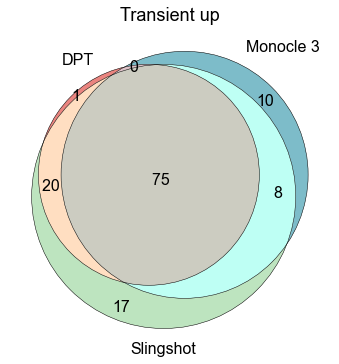

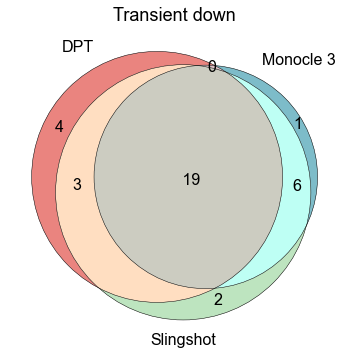

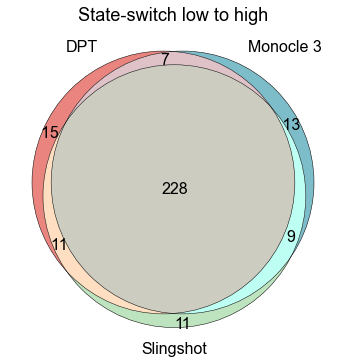

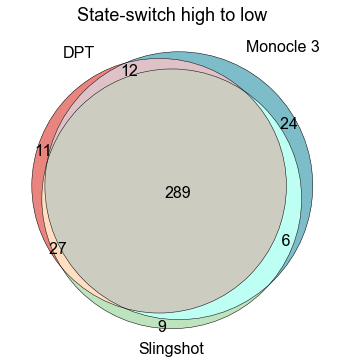

In [110]:
title_dict = {'transient up':'Transient up','transient down':'Transient down',
              'sig up':'State-switch low to high',
              'sig down':'State-switch high to low'}

for sig_type in ['transient up','transient down','sig up','sig down']:
    
    dpt_genes = [x[0] for x in fit_types_dpt.items() if x[1] == sig_type]
    monocle_genes = [x[0] for x in fit_types_monocle.items() if x[1] == sig_type]
    slingshot_genes = [x[0] for x in fit_types_slingshot.items() if x[1] == sig_type]
    dpt_specific = len(set(dpt_genes)-set(monocle_genes)-set(slingshot_genes))
    monocle_specific = len(set(monocle_genes)-set(dpt_genes)-set(slingshot_genes))
    shared_dpt_monocle = len(set(dpt_genes).intersection(monocle_genes)-set(slingshot_genes))
    slingshot_specific = len(set(slingshot_genes)-set(monocle_genes)-set(dpt_genes))
    shared_monocle_slingshot = len(set(slingshot_genes).intersection(monocle_genes)-set(dpt_genes))
    shared_dpt_slingshot = len(set(slingshot_genes).intersection(dpt_genes)-set(monocle_genes))
    shared_all = len(set(dpt_genes).intersection(slingshot_genes).intersection(set(monocle_genes)))
    
    print((dpt_specific, monocle_specific, shared_dpt_monocle, 
                 slingshot_specific,shared_monocle_slingshot,shared_dpt_slingshot,
                 shared_all))
    
    # depict venn diagram 
    plt.figure(figsize=(6,6))
    subsets = (dpt_specific, monocle_specific, shared_dpt_monocle, 
           slingshot_specific,shared_monocle_slingshot,shared_dpt_slingshot,
           shared_all)
    
    venn_plot = venn3(subsets,("DPT","Monocle 3","Slingshot"),
                      set_colors=(sns.color_palette('Spectral')[0],sns.color_palette('Spectral')[5],sns.color_palette('Spectral')[4]), 
                      alpha=0.7)
    
    for text in venn_plot.set_labels:
        text.set_fontsize(16)
    for x in range(len(venn_plot.subset_labels)):
        if venn_plot.subset_labels[x] is not None:
            venn_plot.subset_labels[x].set_fontsize(16)

    venn_plot.get_label_by_id('010').set_text(str(monocle_specific))
    if sig_type == 'transient up':
        venn_plot.get_label_by_id('101').set_text(str(shared_dpt_slingshot)+"    ")
        venn_plot.get_label_by_id('111').set_text(str(shared_all)+"         ")
        venn_plot.get_label_by_id('011').set_text("            "+str(shared_monocle_slingshot))
        venn_plot.get_label_by_id('001').set_text("\n\n"+str(slingshot_specific))
    elif sig_type == 'transient down':
        venn_plot.get_label_by_id('101').set_text(str(shared_dpt_slingshot)+"       ")
        venn_plot.get_label_by_id('111').set_text("         "+str(shared_all))
        venn_plot.get_label_by_id('011').set_text("      "+str(shared_monocle_slingshot))
    elif sig_type == 'sig up':
        venn_plot.get_label_by_id('101').set_text(str(shared_dpt_slingshot)+"     ")
        venn_plot.get_label_by_id('011').set_text("      "+str(shared_monocle_slingshot))
        venn_plot.get_label_by_id('001').set_text("\n"+str(slingshot_specific))
        venn_plot.get_label_by_id('010').set_text("   "+str(monocle_specific))
        venn_plot.get_label_by_id('100').set_text(str(dpt_specific)+"    ")
        venn_plot.get_label_by_id('110').set_text(str(shared_dpt_monocle)+"\n")
    elif sig_type == 'sig down':
        venn_plot.get_label_by_id('101').set_text(str(shared_dpt_slingshot)+"  ")
        venn_plot.get_label_by_id('001').set_text("\n"+str(slingshot_specific))
        venn_plot.get_label_by_id('010').set_text("      "+str(monocle_specific))
        venn_plot.get_label_by_id('100').set_text(str(dpt_specific)+"  ")
        venn_plot.get_label_by_id('110').set_text(str(shared_dpt_monocle)+"\n")
        venn_plot.get_label_by_id('011').set_text("         "+str(shared_monocle_slingshot))
    else:
        venn_plot.get_label_by_id('101').set_text(str(shared_dpt_slingshot))
        venn_plot.get_label_by_id('111').set_text(str(shared_all))
        venn_plot.get_label_by_id('011').set_text(str(shared_monocle_slingshot))
        venn_plot.get_label_by_id('001').set_text(str(slingshot_specific))
        venn_plot.get_label_by_id('010').set_text(str(monocle_specific))
        venn_plot.get_label_by_id('100').set_text(str(dpt_specific))
        venn_plot.get_label_by_id('110').set_text(str(shared_dpt_monocle))

    # add outline 
    venn3_circles(subsets,linewidth=0.5)
    
    plt.title(title_dict[sig_type],fontsize=18)
    plt.savefig('/project/single_cell/Transcriptional_Cascades/Revision/figures/venn_diagram_monocle_slingshot_dpt.'+sig_type+'.pdf',bbox_inches='tight')

In [ ]:
# depict venn diagram 
plt.figure(figsize=(7,7))
subsets = (monocle_specific, tradeseq_specific, 1800, 
       50,shared_monocle_ourmethod,shared_tradeseq_ourmethod,
       shared_all)

venn_plot = venn3(subsets,("Monocle3","TradeSeq","\nThis Paper"),
                  set_colors=(sns.color_palette('Spectral')[0],sns.color_palette('Spectral')[5],sns.color_palette('Spectral')[4]), 
                  alpha=0.7)
for text in venn_plot.set_labels:
    text.set_fontsize(16)
for x in range(len(venn_plot.subset_labels)):
    if venn_plot.subset_labels[x] is not None:
        venn_plot.subset_labels[x].set_fontsize(16)

venn_plot.get_label_by_id('100').set_text(str(monocle_specific))
venn_plot.get_label_by_id('110').set_text(str(shared_monocle_tradeseq))
venn_plot.get_label_by_id('010').set_text(str(tradeseq_specific))
venn_plot.get_label_by_id('101').set_text(str(shared_monocle_ourmethod))
venn_plot.get_label_by_id('111').set_text("\n\n"+str(shared_all))
venn_plot.get_label_by_id('011').set_text(str(shared_tradeseq_ourmethod))
venn_plot.get_label_by_id('001').set_text(str(our_method_specific))

# add outline 
venn3_circles(subsets,linewidth=0.5)  

plt.savefig('/project/single_cell/Transcriptional_Cascades/Revision/figures/venn_diagram_monocle_tradeseq.pdf',bbox_inches='tight')
plt.show()